In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import Adam

## Step 1: Pre-process and create train set

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train1/',
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5994 images belonging to 200 classes.


## Step 2: pre-process and create test set

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('test1/',
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5794 images belonging to 200 classes.


In [13]:
#import IPython.display as ipd

#ipd.Image('training/training/n5/n5024.jpg')

## Step 3: Import the pre- trained model 

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (299, 299, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

## Step 4: Add Flattening, hidden and output layers

In [15]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(200, activation='sigmoid')(x)

inception = tf.keras.models.Model(base_model.input, x)
inception.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'], )

In [16]:
inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_94

## Step 5: Train the model

In [17]:
Inception_hist=inception.fit(training_set, validation_data=test_set, epochs=15)

Epoch 1/15
188/188 [==============================] - 695s 4s/step - loss: 4.1110 - accuracy: 0.1265 - val_loss: 2.9645 - val_accuracy: 0.2584
Epoch 2/15
188/188 [==============================] - 692s 4s/step - loss: 2.6324 - accuracy: 0.3172 - val_loss: 2.4002 - val_accuracy: 0.3637
Epoch 3/15
188/188 [==============================] - 646s 3s/step - loss: 2.1208 - accuracy: 0.4253 - val_loss: 2.0869 - val_accuracy: 0.4382
Epoch 4/15
188/188 [==============================] - 737s 4s/step - loss: 1.8297 - accuracy: 0.4816 - val_loss: 1.9360 - val_accuracy: 0.4765
Epoch 5/15
188/188 [==============================] - 707s 4s/step - loss: 1.6351 - accuracy: 0.5357 - val_loss: 1.8221 - val_accuracy: 0.4981
Epoch 6/15
188/188 [==============================] - 737s 4s/step - loss: 1.4505 - accuracy: 0.5836 - val_loss: 1.7662 - val_accuracy: 0.4998
Epoch 7/15
188/188 [==============================] - 796s 4s/step - loss: 1.3156 - accuracy: 0.6131 - val_loss: 1.7362 - val_accuracy: 0.5231

## Step 6: Train and Test accuracy, loss plots

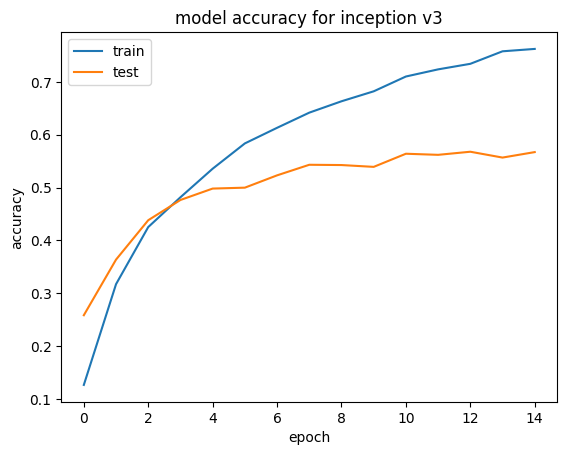

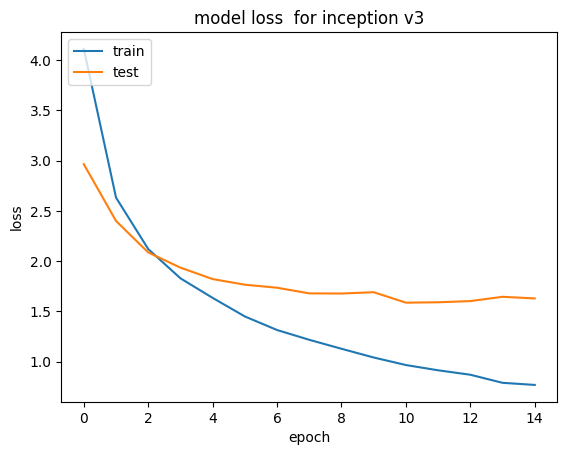

In [18]:
# summarize history for accuracy
plt.plot(Inception_hist.history['accuracy'])
plt.plot(Inception_hist.history['val_accuracy'])
plt.title('model accuracy for inception v3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(Inception_hist.history['loss'])
plt.plot(Inception_hist.history['val_loss'])
plt.title('model loss  for inception v3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
inception.save('inception_model')  # The SavedModel format

INFO:tensorflow:Assets written to: inception_model\assets


INFO:tensorflow:Assets written to: inception_model\assets


In [23]:
import json

# Convert the history.history dict to a JSON file
with open('inception_training_history.json', 'w') as f:
    json.dump(Inception_hist.history, f)

In [27]:
from tensorflow.keras.models import load_model

#model = load_model('inception_model.h5')  # For HDF5 format
# or
model2 = load_model('inception_model')  # For SavedModel format

with open('inception_training_history.json', 'r') as f:
    history = json.load(f)
